In [7]:
from PIL import Image as Img
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import transforms
from torch import optim

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

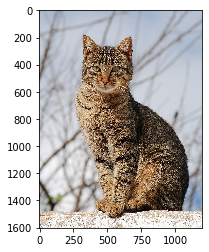

In [10]:
img = Img.open("cat.jpg")
plt.imshow(img,cmap='gray',interpolation='none')

Image size before unsqueeze:  torch.Size([1, 150, 150])
Image size after unsqueeze:  torch.Size([1, 1, 150, 150])
Shape after Conv Layer 1 torch.Size([1, 4, 150, 150])
MaxPool1 torch.Size([1, 4, 147, 147])
Size after squeeze torch.Size([4, 147, 147])
Shape after Conv Layer 2 torch.Size([1, 4, 150, 150])
MaxPool2 torch.Size([1, 4, 147, 147])
Size after squeeze torch.Size([4, 147, 147])
Shape after Conv Layer 3 torch.Size([1, 4, 150, 150])
MaxPool3 torch.Size([1, 4, 147, 147])
Size after squeeze torch.Size([4, 147, 147])
Shape after Conv Layer 4 torch.Size([1, 4, 150, 150])
MaxPool4 torch.Size([1, 4, 147, 147])
Size after squeeze torch.Size([4, 147, 147])
Shape after Conv Layer 4 torch.Size([1, 4, 150, 150])
MaxPool5 torch.Size([1, 4, 147, 147])
Size after squeeze torch.Size([4, 147, 147])
------ 0


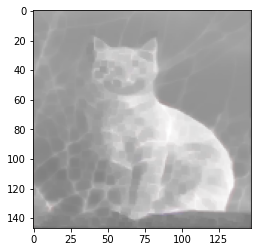

------ 1


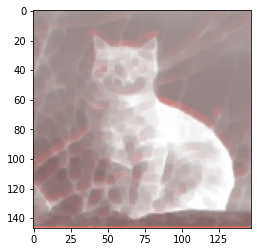

------ 2


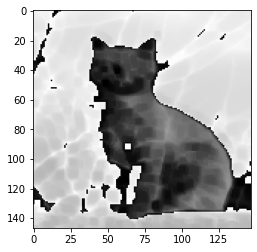

------ 3


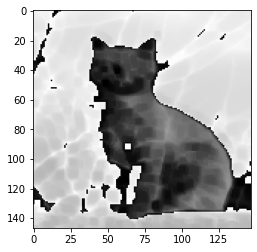

------ 4


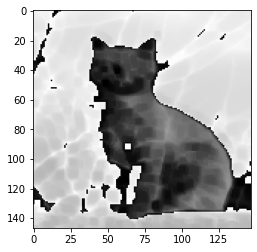

In [19]:
Transform = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.Grayscale(),
    transforms.ToTensor()
    ])
imgt = Transform(img)
print("Image size before unsqueeze: ", imgt.shape)

imgt = imgt.unsqueeze(0)
print("Image size after unsqueeze: ", imgt.shape)

img_loader = DataLoader(imgt, batch_size=1)
lis =[]
class Conv_Layer(nn.Module):
    def __init__(self):
        super(Conv_Layer, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.mp1 = nn.MaxPool2d(kernel_size=4, stride=1)

        self.conv2 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.mp2 = nn.MaxPool2d(kernel_size=4, stride=1)

        self.conv3 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.mp3 = nn.MaxPool2d(kernel_size=4, stride=1)

        self.conv4 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.mp4 = nn.MaxPool2d(kernel_size=4, stride=1)

        self.conv5 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.mp5 = nn.MaxPool2d(kernel_size=4, stride=1)

    def forward(self, x):
        
        z = torch.relu(self.conv1(x))
        print("Shape after Conv Layer 1", z.shape)
        z = self.mp1(z)
        print("MaxPool1", z.shape)
        z = z.squeeze()
        print("Size after squeeze", z.shape )
        a = transforms.ToPILImage()(z)
        lis.append(a)
       #named_layers = dict(model.named_modules())
        #print(named_layers)
        z = z.unsqueeze(0)

        z = torch.relu(self.conv2(x))
        print("Shape after Conv Layer 2", z.shape)
        z = self.mp2(z)
        print("MaxPool2", z.shape)
        z = z.squeeze()
        print("Size after squeeze", z.shape )
        b = transforms.ToPILImage()(z)
        lis.append(b)
      #  plt.imshow(b)
        z = z.unsqueeze(0)

        z = torch.relu(self.conv3(x))
        print("Shape after Conv Layer 3", z.shape)
        z = self.mp3(z)
        print("MaxPool3", z.shape)
        z = z.squeeze()
        print("Size after squeeze", z.shape )
        c = transforms.ToPILImage()(z)
        lis.append(c)
     #   plt.imshow(c)
        z=z.unsqueeze(0)

        z = torch.relu(self.conv3(x))
        print("Shape after Conv Layer 4", z.shape)
        z = self.mp4(z)
        print("MaxPool4", z.shape)
        z = z.squeeze()
        print("Size after squeeze", z.shape )
        d = transforms.ToPILImage()(z)
        lis.append(d)
        z=z.unsqueeze(0)

        z = torch.relu(self.conv3(x))
        print("Shape after Conv Layer 4", z.shape)
        z = self.mp5(z)
        print("MaxPool5", z.shape)
        z = z.squeeze()
        print("Size after squeeze", z.shape )
        e = transforms.ToPILImage()(z)
        lis.append(e)

model = Conv_Layer().to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

correct = 0
batch = 0

for images in img_loader:
        outputs = model(images)
        

for i in range(len(lis)):
    plt.imshow(lis[i])
    print("------",i)
    plt.show()